## Merging datasets from two satellite intruments : ISS_LIS and TROPOMI into dataframe and save as CSV

In [1]:
import netCDF4 as nc4
from netCDF4 import Dataset
import numpy as np
import pandas as pd

#### STEP-01: READ LIS CSV FILE

In [2]:
## Lets read the lis csv file for 16-17th july 2022,region:canada
iss_lis = pd.read_csv(r'C:\Users\Aditya\Desktop\Research2022_Walker\iss_no2_test\iss_lis16july2022_v3.csv')

In [3]:
### Change columns name to lat and lon (as per the column name of TROPOMI datafiles lat and lon)

iss_lis.rename(columns={'flash_lat': 'lat', 'flash_lon': 'lon'}, inplace=True)
iss_lis

,lat,lon,flash_radiance,flash_time_loc,flash_parent_address
0,52.285534,-83.065956,253300.0,2022-07-16 03:34:39 -0400,33.0
1,52.675556,-78.900047,3913977.0,2022-07-16 03:35:48 -0400,34.0
2,51.050793,-104.763046,13620.0,2022-07-16 05:07:26 -0400,0.0
3,51.144081,-104.693893,335410.0,2022-07-16 05:07:29 -0400,0.0
4,51.175934,-104.811951,145902.0,2022-07-16 05:07:31 -0400,0.0
...,...,...,...,...,...
1678,47.236641,-101.432999,854450.0,2022-07-16 08:22:27 -0400,9.0
1679,47.318756,-101.372711,320838.0,2022-07-16 08:23:19 -0400,9.0
1680,48.330528,-100.968330,320281.0,2022-07-16 08:22:40 -0400,11.0
1681,48.427315,-100.902489,27739.0,2022-07-16 08:22:40 -0400,11.0


In [4]:
### change dtype based on our requirements (will help to optimize processing time further)
iss_lis = iss_lis.astype({'lat': 'float64', 'lon': 'float64','flash_radiance':'int32','flash_parent_address':'int16'})
#iss_lis.info()

In [5]:
iss_lis

,lat,lon,flash_radiance,flash_time_loc,flash_parent_address
0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33
1,52.675556,-78.900047,3913977,2022-07-16 03:35:48 -0400,34
2,51.050793,-104.763046,13620,2022-07-16 05:07:26 -0400,0
3,51.144081,-104.693893,335410,2022-07-16 05:07:29 -0400,0
4,51.175934,-104.811951,145902,2022-07-16 05:07:31 -0400,0
...,...,...,...,...,...
1678,47.236641,-101.432999,854450,2022-07-16 08:22:27 -0400,9
1679,47.318756,-101.372711,320838,2022-07-16 08:23:19 -0400,9
1680,48.330528,-100.968330,320281,2022-07-16 08:22:40 -0400,11
1681,48.427315,-100.902489,27739,2022-07-16 08:22:40 -0400,11


#### STEP-02: READ TROPOMI CSV FILE

In [6]:
## Lets read the lis csv file for 16-17th july 2022,region:canada
tp_no2 = pd.read_csv(r'C:\Users\Aditya\Desktop\Research2022_Walker\iss_no2_test\tropomi_iss_july16to17_2022_full_v3.csv')

In [7]:
tp_no2

,along_index,across_index,lat,lon,no2_delta_time,no2_val,qa_val
0,310,355,41.000668,-71.981290,2022-07-16 17:33,0.000007,100
1,310,356,41.004734,-71.997700,2022-07-16 17:33,0.000007,100
2,310,357,41.008750,-72.014260,2022-07-16 17:33,0.000007,100
3,310,358,41.012726,-72.030790,2022-07-16 17:33,0.000007,100
4,310,359,41.016647,-72.047330,2022-07-16 17:33,0.000006,100
...,...,...,...,...,...,...,...
375568,1943,138,49.631554,-53.248207,2022-07-16 23:02,0.000006,0
375569,1943,139,49.642350,-52.452460,2022-07-16 23:02,0.000007,0
375570,1943,140,49.653100,-51.656254,2022-07-16 23:02,0.000006,0
375571,1943,141,49.663803,-50.859280,2022-07-16 23:02,0.000006,0


In [8]:
#tp_no2.info()

In [9]:
tp_no2 = tp_no2.astype({'lat': 'float64', 'lon': 'float64','along_index':'int32','across_index':'int32','no2_val':'float32','qa_val':'int16'})
tp_no2

,along_index,across_index,lat,lon,no2_delta_time,no2_val,qa_val
0,310,355,41.000668,-71.981290,2022-07-16 17:33,0.000007,100
1,310,356,41.004734,-71.997700,2022-07-16 17:33,0.000007,100
2,310,357,41.008750,-72.014260,2022-07-16 17:33,0.000007,100
3,310,358,41.012726,-72.030790,2022-07-16 17:33,0.000007,100
4,310,359,41.016647,-72.047330,2022-07-16 17:33,0.000006,100
...,...,...,...,...,...,...,...
375568,1943,138,49.631554,-53.248207,2022-07-16 23:02,0.000006,0
375569,1943,139,49.642350,-52.452460,2022-07-16 23:02,0.000007,0
375570,1943,140,49.653100,-51.656254,2022-07-16 23:02,0.000006,0
375571,1943,141,49.663803,-50.859280,2022-07-16 23:02,0.000006,0


#### STEP-03: Find NOx profile  around a each flash light 

In [10]:
### flash strikes in given region (this region is subset to the region queried for tropomi_no2 data) 

#iss_lis_1 = iss_lis.query('-102.5 <= lon <= -101.5 and 49.5 < lat <= 50.5').reset_index().round(decimals=6)
iss_lis_1 = iss_lis.query('0 <= index <= 100').reset_index().round(decimals=6)
iss_lis_1

,index,lat,lon,flash_radiance,flash_time_loc,flash_parent_address
0,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33
1,1,52.675556,-78.900047,3913977,2022-07-16 03:35:48 -0400,34
2,2,51.050793,-104.763046,13620,2022-07-16 05:07:26 -0400,0
3,3,51.144081,-104.693893,335410,2022-07-16 05:07:29 -0400,0
4,4,51.175934,-104.811951,145902,2022-07-16 05:07:31 -0400,0
...,...,...,...,...,...,...
96,96,50.116425,-102.696159,1315628,2022-07-16 05:08:10 -0400,2
97,97,49.935116,-102.904961,45945,2022-07-16 05:08:11 -0400,2
98,98,50.188610,-102.588448,715719,2022-07-16 05:08:12 -0400,2
99,99,49.884842,-102.835014,55000,2022-07-16 05:08:14 -0400,2


In [11]:
%%time
### Cross merging (required step to check if given no2 reading within flash range or not)

df_out = iss_lis_1.merge(tp_no2, how='cross') 
#df_out.head()
#df_out.info()

CPU times: total: 3.33 s
Wall time: 3.35 s


In [12]:
len(df_out)

37932873

In [13]:
%%time
### Find distance between flash point and NO2 data point

df_out['lat_diff'] = df_out['lat_x'].sub(df_out['lat_y'], axis = 0)
df_out['lon_diff'] = (df_out['lon_x'] - df_out['lon_y']).abs()
df_out

CPU times: total: 859 ms
Wall time: 602 ms


,index,lat_x,lon_x,flash_radiance,flash_time_loc,flash_parent_address,along_index,across_index,lat_y,lon_y,no2_delta_time,no2_val,qa_val,lat_diff,lon_diff
0,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,310,355,41.000668,-71.981290,2022-07-16 17:33,0.000007,100,11.284866,11.084666
1,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,310,356,41.004734,-71.997700,2022-07-16 17:33,0.000007,100,11.280800,11.068256
2,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,310,357,41.008750,-72.014260,2022-07-16 17:33,0.000007,100,11.276784,11.051696
3,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,310,358,41.012726,-72.030790,2022-07-16 17:33,0.000007,100,11.272808,11.035166
4,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,310,359,41.016647,-72.047330,2022-07-16 17:33,0.000006,100,11.268887,11.018626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37932868,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1943,138,49.631554,-53.248207,2022-07-16 23:02,0.000006,0,0.206482,49.709160
37932869,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1943,139,49.642350,-52.452460,2022-07-16 23:02,0.000007,0,0.195686,50.504907
37932870,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1943,140,49.653100,-51.656254,2022-07-16 23:02,0.000006,0,0.184936,51.301113
37932871,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1943,141,49.663803,-50.859280,2022-07-16 23:02,0.000006,0,0.174233,52.098087


In [14]:
%%time
### Now lets filter the rows where the distance between flash point and NO2 data point in less than 1 degree

df_out_1 = df_out.query('-1 < lon_diff < 1 and -1 < lat_diff < 1')
df_out_1

CPU times: total: 13.6 s
Wall time: 16.2 s


,index,lat_x,lon_x,flash_radiance,flash_time_loc,flash_parent_address,along_index,across_index,lat_y,lon_y,no2_delta_time,no2_val,qa_val,lat_diff,lon_diff
51056,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,529,408,51.790768,-82.098690,2022-07-16 17:36,0.000010,74,0.494766,0.967266
51057,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,529,409,51.787895,-82.134290,2022-07-16 17:36,0.000010,74,0.497639,0.931666
51058,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,529,410,51.784750,-82.169990,2022-07-16 17:36,0.000009,74,0.500784,0.895966
51059,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,529,411,51.781330,-82.205700,2022-07-16 17:36,0.000007,74,0.504204,0.860256
51060,0,52.285534,-83.065956,253300,2022-07-16 03:34:39 -0400,33,529,412,51.777620,-82.241486,2022-07-16 17:36,0.000006,74,0.507914,0.824470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930409,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1934,209,50.755295,-103.298610,2022-07-16 23:02,0.000008,0,-0.917259,0.341243
37930410,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1934,210,50.764490,-103.007270,2022-07-16 23:02,0.000008,0,-0.926454,0.049903
37930411,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1934,211,50.773678,-102.711640,2022-07-16 23:02,0.000008,0,-0.935642,0.245727
37930412,100,49.838036,-102.957367,265926,2022-07-16 05:08:14 -0400,2,1934,212,50.782860,-102.411490,2022-07-16 23:02,0.000008,0,-0.944824,0.545877


In [15]:
%%time
### Merge dataframe based on latitude and longitude columns
### Cross merged dataframe has lis data and tropomi data in different columns but to analyze the final data we need to merge lat and lon into on column as well as eliminate the unwanted columns  to concat it along axis=0 

df1_iss = df_out_1[['index','lat_x','lon_x','flash_radiance','flash_time_loc','flash_parent_address']]
df1_iss.rename(columns={'index':'flash_id','lat_x': 'lat', 'lon_x': 'lon'}, inplace=True)
df1_iss = df1_iss.drop_duplicates(keep='first')

df1_no2 = df_out_1[['no2_delta_time','lat_y','lon_y','no2_val','qa_val','index']]
df1_no2.rename(columns={'lat_y': 'lat', 'lon_y': 'lon','index':'flash_id'}, inplace=True)

iss_tp_box = pd.concat([df1_iss,df1_no2]).dropna(subset = ['no2_val','flash_radiance'], how='all')### drop rows when both flash and no2 values are NaN
iss_tp_box

<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 891 ms
Wall time: 1.43 s


,flash_id,lat,lon,flash_radiance,flash_time_loc,flash_parent_address,no2_delta_time,no2_val,qa_val
51056,0,52.285534,-83.065956,253300.0,2022-07-16 03:34:39 -0400,33.0,NaN,NaN,NaN
428986,1,52.675556,-78.900047,3913977.0,2022-07-16 03:35:48 -0400,34.0,NaN,NaN,NaN
795098,2,51.050793,-104.763046,13620.0,2022-07-16 05:07:26 -0400,0.0,NaN,NaN,NaN
1170670,3,51.144081,-104.693893,335410.0,2022-07-16 05:07:29 -0400,0.0,NaN,NaN,NaN
1546244,4,51.175934,-104.811951,145902.0,2022-07-16 05:07:31 -0400,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37930409,100,50.755295,-103.298610,NaN,NaN,NaN,2022-07-16 23:02,0.000008,0.0
37930410,100,50.764490,-103.007270,NaN,NaN,NaN,2022-07-16 23:02,0.000008,0.0
37930411,100,50.773678,-102.711640,NaN,NaN,NaN,2022-07-16 23:02,0.000008,0.0
37930412,100,50.782860,-102.411490,NaN,NaN,NaN,2022-07-16 23:02,0.000008,0.0


In [16]:
# iss_tp_box = iss_tp_box.astype({'flash_parent_address': 'int32', 'qa_val': 'int16'})
# iss_tp_box

In [17]:
iss_tp_box.to_csv('iss_lis_and_tropomi_no2_merged_box_analysis_two_flashes_v3_100flashes.csv')

### cOdE eNdS hErE

Final CSV file shoul look as...

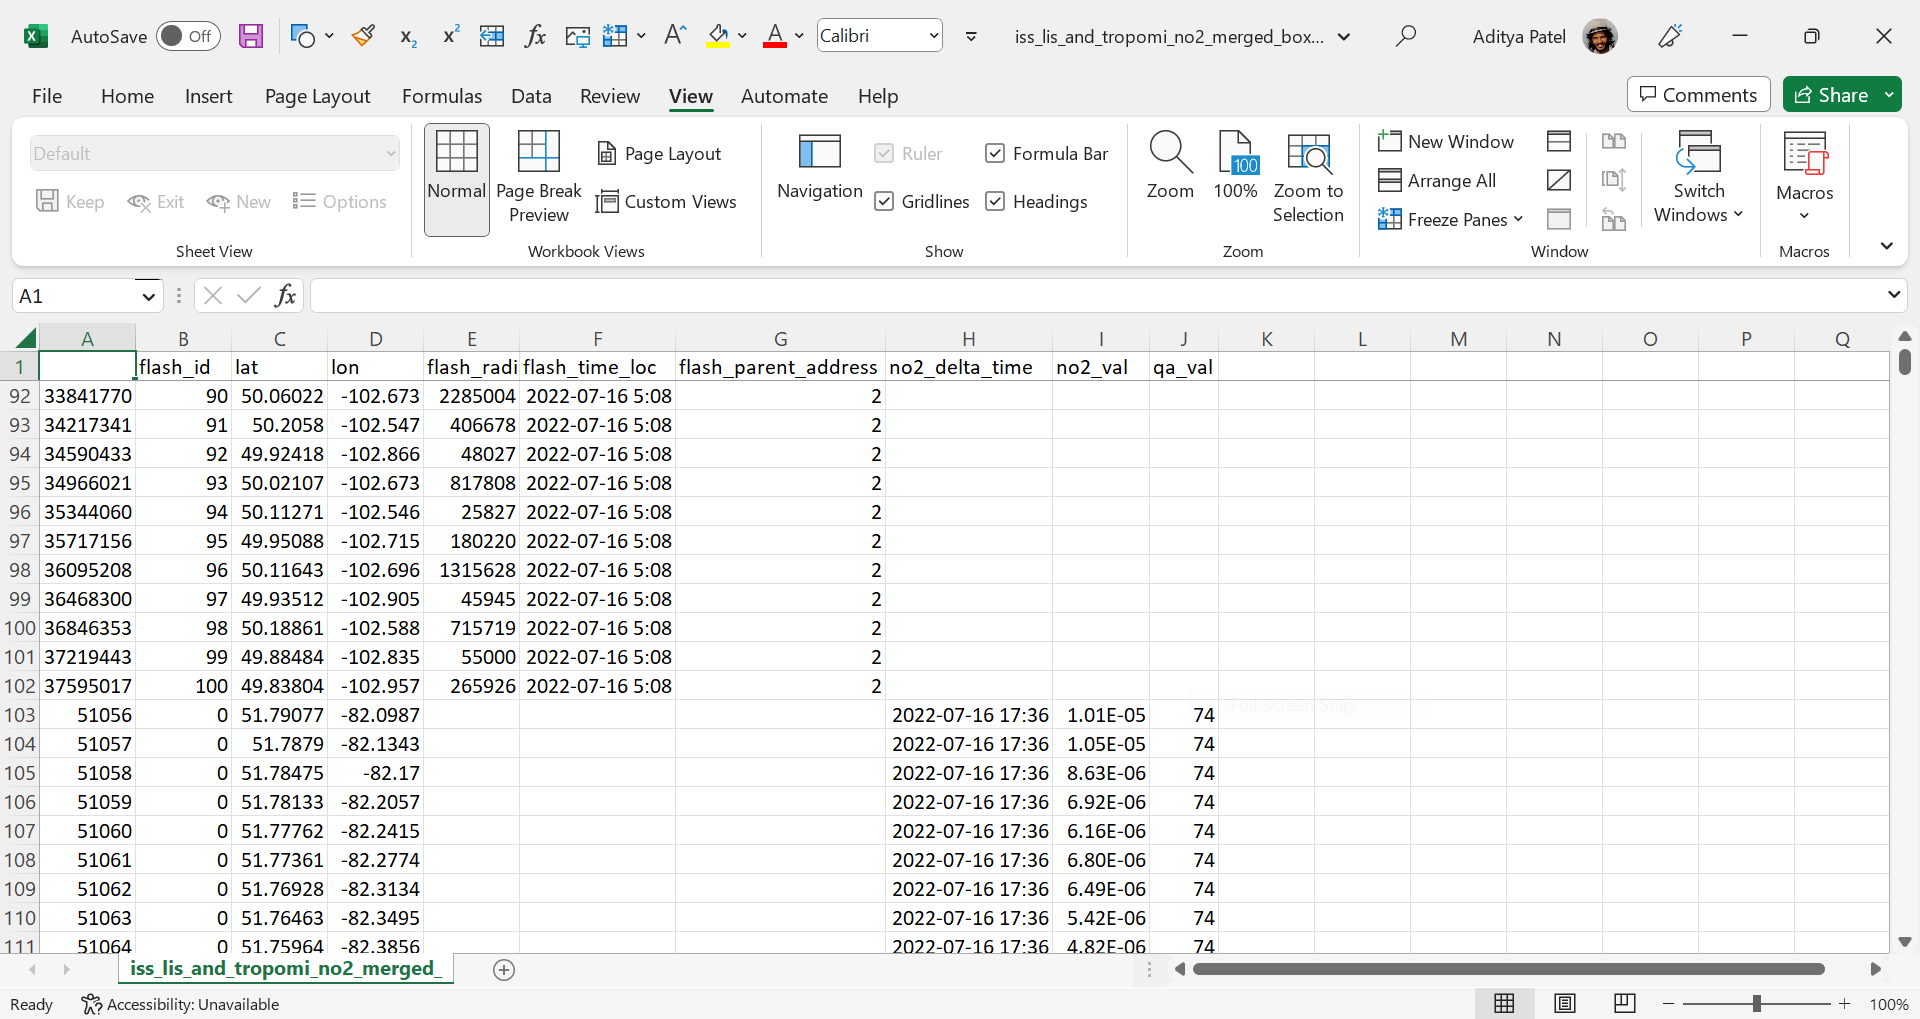

TABLEAU VISUALIZATION:
Nitrogen oxide profile around lightning with FLASH ID - 75 (Region is somewhere in south Saskatchewan,Canada)
1. Red dot represents the highest flash value for flash ID 75 (represented by NULL mean no2 value is zero)
2. Each NO2 values are multiplied by 10^10 to analyse
3. NO2 data is filtered wrt qa_value > 90
3. Null value for NO2 is filtered
4. Dark green is mean more NOx produced, yellow means least 
6. Time lag between NOx and ISS_LIS reading ie NOx is detected ~13hours after the flash was detected by LIS *(ISS_LIS: 16th july 2022, 6:00AM & TROPOMI_NOx: 16th july 2022, 7:00PM) 

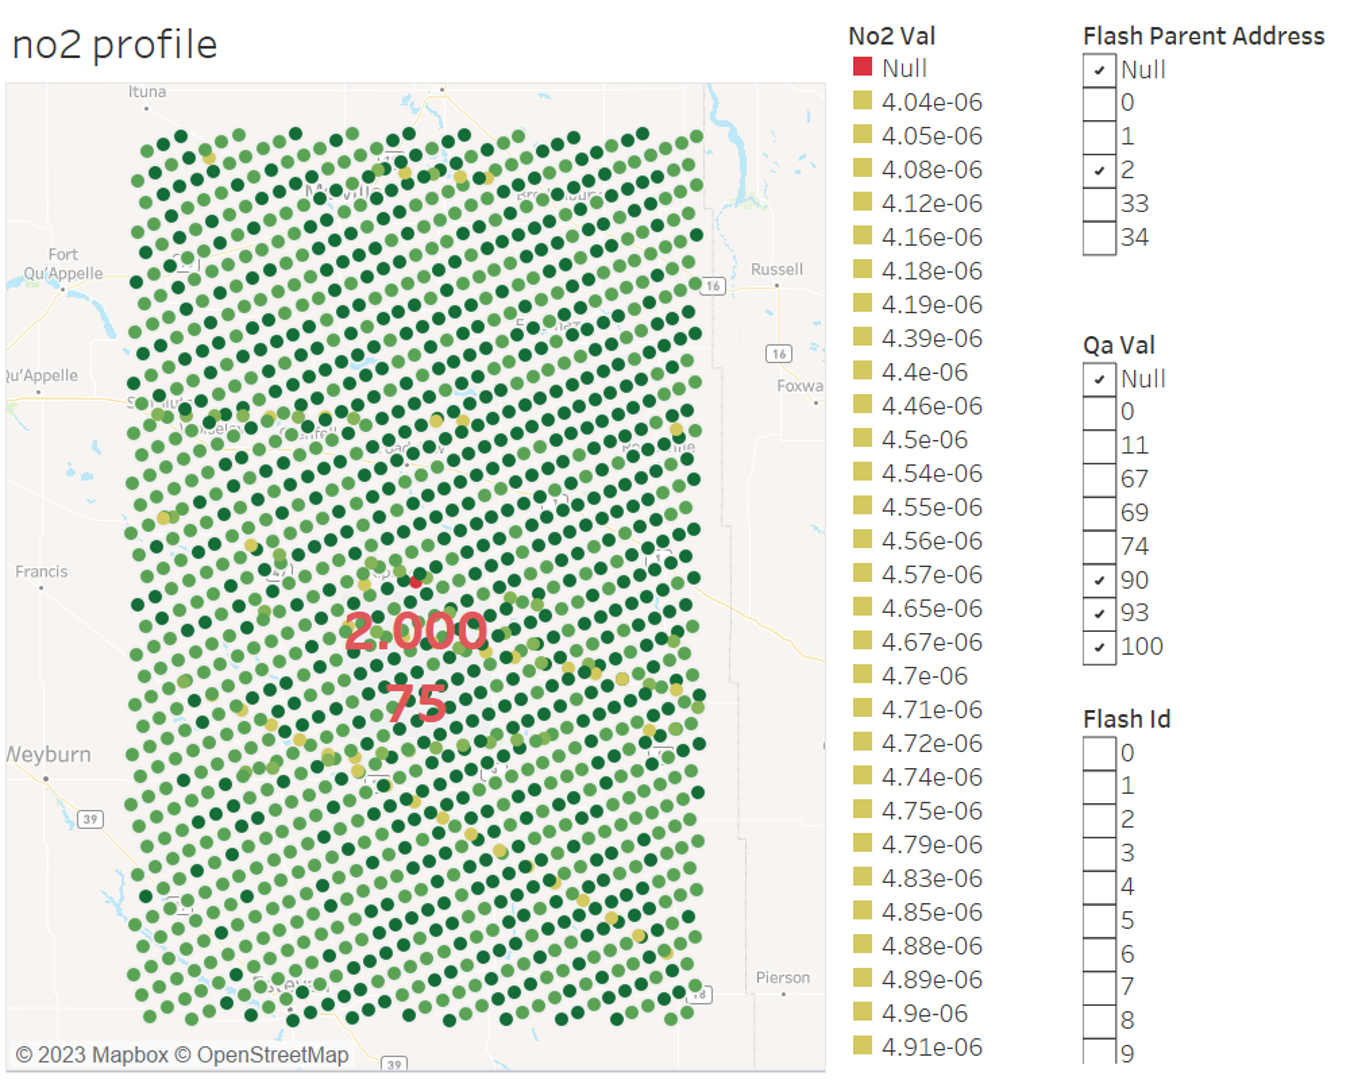

## Issues yet to be addressed

## ISSUE: 01:_Major issue
Memory Issue ,High processing time to check conditon when analysing more number of flashes
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
*Preference:*
High priority
--------------------------------------------------------------------------------------------------------------------------------
*Details:*
The raw data from NETCDF4 file is is in the array form which is converted to pandas dataframe and finally processed data is saved as CSV file.
NO2 data is of very high resolution and large approx 3.7lakhs rows 
We want to check the NO2 data point are lying within 100 kilometers of each flash point
Firstly the tropomi and lis data frames are cross merged: Each flash is added as whole NO2 data(approx 3.7lakhs rows),
Than we add columns to lis data and find the distance between the flash point and NO2 data point 
[the latitude difference (distance between lis lat and tropomi lat) and longitude (distance between lis lon and tropomi lon)], 
Finally all values less than 1 degrees(approx 111kms) are filtered. 

--------------------------------------------------------------------------------------------------------------------------------
*Specific Requirement* 
The above code worked good when number of flash points to be analysed are less in number
But as more and more number of flashes are analyzed it hangs up the system and pandas fail here.
--------------------------------------------------------------------------------------------------------------------------------
*Required outcome:*
to find NO2 values within specfic range of flash point 
Any improvement/new method which helps in
Shortening of processing time when large number of flash points are to be analyzed at once.

--------------------------------------------------------------------------------------------------------------------------------
## Related attempts:[1] *Convert panadas dataframe into dask dataframe (parallelized pandas)

    #import dask.dataframe as dd
    #ddf = dd.from_pandas(df_out_test, npartitions=10

    # def boxlon(df):
    #     return df.apply(lambda x: x['srno'] if x['lon_y'] >= x['flash_lon_minus'] and x['lon_y'] <= x['flash_lon_plus'] else np.nan, axis=1)

    # p = ddf.map_partitions(boxlon, meta=(None, 'int64'))
    # p.compute()
    # #p.to_csv('p_dask_test.csv')
--------------------------------------------------------------------------------------------------------------------------------


## ISSUE: 01:_Major issue
Memory Issue, High processing time to check conditon when analysing more number of flashes
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
*Preference:*
High priority
--------------------------------------------------------------------------------------------------------------------------------
## Related attempts:[2]*Divide a big box into smaller boxes

Currently we have a data queried spatially for a wider region:-140 <= lon <= -50 and 41 < lat <= 56' and so each code checks NO2 value for the whole region whether it is within 100kms of flash point
 What if?
We divide the big box vertically into say 4 and execute the same code to reduce number of iterations
 Further we can eliminate the NO2 values lying way outside flashes by quering for min and max lat lon for lis inside each box
    
    ### flash strikes in given region (this region is subset to the region queried for tropomi_no2 data) 

    iss_lis_2 = iss_lis.query('-125 <= lon <= -100')#.reset_index().round(decimals=6)
    print(iss_lis_2.lat.min()-1) ##min value =48
    print(iss_lis_2.lat.max()+1) ##max value =52.26
    print(iss_lis_2.lon.min()-1) ##min value =-106
    print(iss_lis_2.lon.max()+1) ##max value =-100
    tp_no2_2 = tp_no2.query('-106 <= lon <= -100' and '48 <= lat <= 52.26')#.reset_index().round(decimals=6)
    print(iss_lis_2)
    print(tp_no2_2)

*limitation of method[2]: When many flashes are spatially clustered and occuring very close to each other divison of a big box into smaller say into 4 won't help much 

## ISSUE: 01:_Major issue
Memory Issue ,High processing time to check conditon when analysing more number of flashes
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
*Preference:*
High priority
--------------------------------------------------------------------------------------------------------------------------------
## Related attempts:[3]*Directly process raw satellite data obltained in array form from NETCDF4 files and find NO2 field near each flash point (instead of converting it to raw data pandas dataframe and than creating imaginary box to find it)
    
    from scipy.spatial.distance import pdist, squareform
    import numpy as np

    points = np.random.uniform(-0.1, 0.1, (5,2))  ### create an array
    points
   Output:
    array([[ 0.08997501,  0.06332118],
       [ 0.01879947, -0.08414794],
       [ 0.02069245,  0.00011062],
       [-0.057657  ,  0.0563319 ],
       [ 0.0869381 , -0.03660487]])
       
    # Compute the distance between each different pair of points in X with pdist.
    # Then, just for ease of working, convert to a typical symmetric distance matrix
    # with squareform.
    dists = squareform(pdist(points))
    dists
    
    poi = points[1] # point of interest
    dist_min = 0.1
    close_points = dists[1] < dist_min

    print("There are {} other points within a distance of {} from the point "
        "({:.3f}, {:.3f})".format(close_points.sum() - 1, dist_min, *poi))
  Output: There are 2 other points within a distance of 0.1 from the point (0.019, -0.084)
    
*Related resources:
https://scipy.github.io/devdocs/reference/spatial.distance.html


**All new ideas/logic to excecute above code more efficiently and faster are always welcomed and Thank you very much for contributing your precious time here! :)**